# EDA Notebook
David Kalen

We are analyzing the two cab companies to determine which is a better investment for XYZ.

First lets print the heads of each file, and understand what data is in each of them.

### Cab_Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_cab_data = pd.read_csv("Cab_Data.csv")
print(len(df_cab_data))
df_cab_data.head()

359392


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### City

In [2]:
df_city = pd.read_csv("City.csv")
print(len(df_city))
df_city.head()


20


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer ID

In [3]:
df_customer_id = pd.read_csv("Customer_ID.csv")
print(len(df_customer_id))
df_customer_id.head()

49171


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction ID

In [4]:
df_transaction_id = pd.read_csv("Transaction_ID.csv")
print(len(df_transaction_id))
df_transaction_id.head()

440098


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Data Cleaning

Now that we have a basic understanding of the data. We now have to clean it.

In [5]:
# First let's merge Transaction ID with Cab Data
df_cab_data = pd.merge(df_cab_data, df_transaction_id, on='Transaction ID')
df_cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Checking each data set for duplicate rows
print(df_cab_data.duplicated().sum())
print(df_city.duplicated().sum())
print(df_customer_id.duplicated().sum())
print(df_transaction_id.duplicated().sum())

# Let's check for all the unique values in the different columns
# First we start with the columns that have objects as variables

# Company
print(df_cab_data['Company'].unique())
# The Company column doesn't have any null values, so we can move on

# City
print(df_cab_data['City'].unique())
# The City column also doesn't have any null values

# Payment Mode
print(df_cab_data['Payment_Mode'].unique())
print('\n')
# The Payment Mode column also doesn't have any null values

# Date of Travel
# Convert 'Date of Travel' to datetime if not already in that format
df_cab_data['Date of Travel'] = pd.to_datetime(df_cab_data['Date of Travel'], origin='1899-12-30', unit='D')
print(df_cab_data.head())
# Check for Null Values
null_values_dt_sum = df_cab_data['Date of Travel'].isnull().sum()
print(f'Num of null values in Date of Travel: {null_values_dt_sum}')

# Find the range of dates
min_date = df_cab_data['Date of Travel'].min()
max_date = df_cab_data['Date of Travel'].max()

# Print the range of dates
print(f"Date range: {min_date} to {max_date}\n")
# There are no outliers in the date range.

# Transaction ID
# Checking min to max for outliers
min_t_id = df_cab_data['Transaction ID'].min()
max_t_id = df_cab_data['Transaction ID'].max()
print(f"Transaction ID range: {min_t_id} to {max_t_id} ")

# Checking for null values
null_values_trans_sum = df_cab_data['Transaction ID'].isnull().sum()
print(f'Num of null values in Date of Travel: {null_values_trans_sum}')

# Check if there are any duplicates in 'Transaction ID'
has_duplicates = df_cab_data['Transaction ID'].duplicated().sum()
print(f"Number of duplicate Transaction IDs in Cab Data: {has_duplicates}\n")

# Price Charged
# Checking min to max for outliers
min_pc = df_cab_data['Price Charged'].min()
max_pc = df_cab_data['Price Charged'].max()
print(f"Price Charged range: {min_pc} to {max_pc} ")

# Checking for null values
null_values_pc_sum = df_cab_data['Price Charged'].isnull().sum()
print(f'Num of null values in Date of Travel: {null_values_pc_sum}')

# Cost of Trip
# Checking min to max for outliers
min_ct = df_cab_data['Cost of Trip'].min()
max_ct = df_cab_data['Cost of Trip'].max()
print(f"Cost of Trip range: {min_ct} to {max_ct} ")

# Checking for null values
null_values_ct_sum = df_cab_data['Cost of Trip'].isnull().sum()
print(f'Num of null values in Cost of Trip: {null_values_ct_sum}')

# Customer ID
# Checking min to max for outliers
min_c_id = df_cab_data['Customer ID'].min()
max_c_id = df_cab_data['Customer ID'].max()
print(f"Customer ID range: {min_c_id} to {max_c_id} ")

# Checking for null values
null_values_c_id_sum = df_cab_data['Customer ID'].isnull().sum()
print(f'Num of null values in Customer ID: {null_values_c_id_sum}')

# Cheeking for 
has_duplicates = df_cab_data['Transaction ID'].duplicated().sum()
print(f"Number of duplicate Transaction IDs in Cab Data: {has_duplicates}\n")

0
0
0
0
['Pink Cab' 'Yellow Cab']
['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
['Card' 'Cash']


   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3        

# Hypotheses

I'm going to come up with some hypothesis' that well help me in analyzing the data critically. This will help me both with which company is more profitable or a better investment and what variables help me come to that conclusion.

Hypotheses :

* Which company has the highest number of cab users in different cities?
* Does the total revenue or margin per trip increase with distance (KM traveled)?
* Is there a specific time period where one company sees a spike in users compared to the other?
* Does a higher number of repeat customers correlate with higher profitability for one company over the other?
* What is the preferred payment method (cash or card) for each company's customers, and does this affect revenue?
* Which company operates more efficiently in terms of cost vs. revenue per trip?
* Over the time of data which company his increasing profits, and by how much?

* One last thing want to do is to see how much each company profited in each year to see growth.

## Hypothesis 1

Which company has the highest number of cab users in different cities?

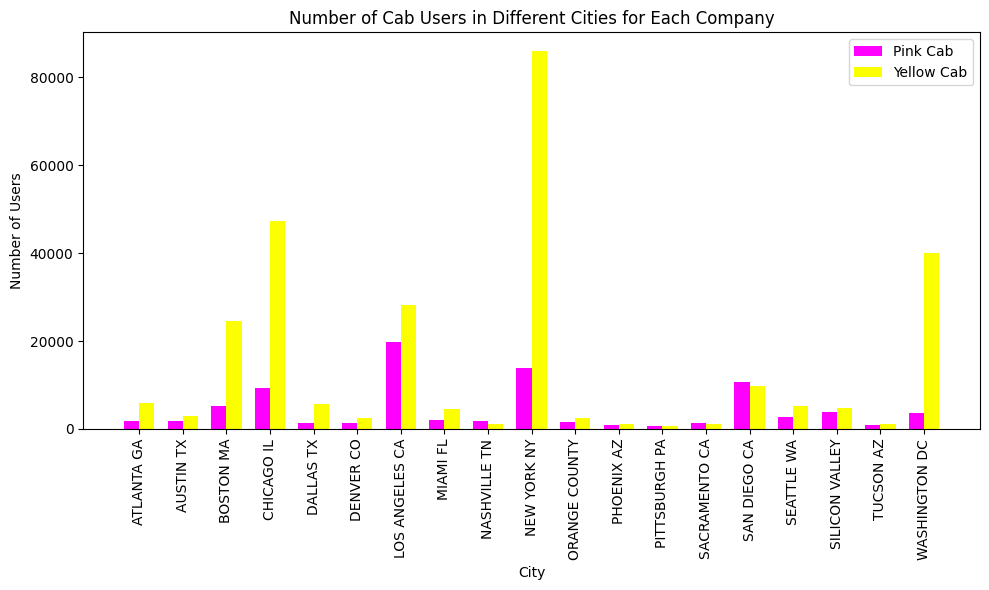

In [7]:
# Group by city and company to get the count of transactions
df_city_company_counts = df_cab_data.groupby(['City', 'Company']).size().reset_index(name='Num_Users')

# SGroup by city and company to get the count of transactions
df_city_company_counts = df_cab_data.groupby(['City', 'Company']).size().reset_index(name='Num_Users')

# Pivot the data to create separate columns for each company
df_pivot = df_city_company_counts.pivot(index='City', columns='Company', values='Num_Users').fillna(0)

# Define parameters for the bar plot
bar_width = 0.35
index = np.arange(len(df_pivot))  # Define the positions of the bars on the x-axis

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each company
bars_1 = ax.bar(index, df_pivot['Pink Cab'], bar_width, label='Pink Cab', color='magenta')
bars_2 = ax.bar(index + bar_width, df_pivot['Yellow Cab'], bar_width, label='Yellow Cab', color='#fbff00')

# Add labels and title
ax.set_xlabel('City')
ax.set_ylabel('Number of Users')
ax.set_title('Number of Cab Users in Different Cities for Each Company')

# Add x-axis tick labels for cities and rotate for readability
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_pivot.index, rotation=90)

# Add a legend
ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


## Hypothesis 2

Does the total revenue or margin per trip increase with distance (KM traveled)?

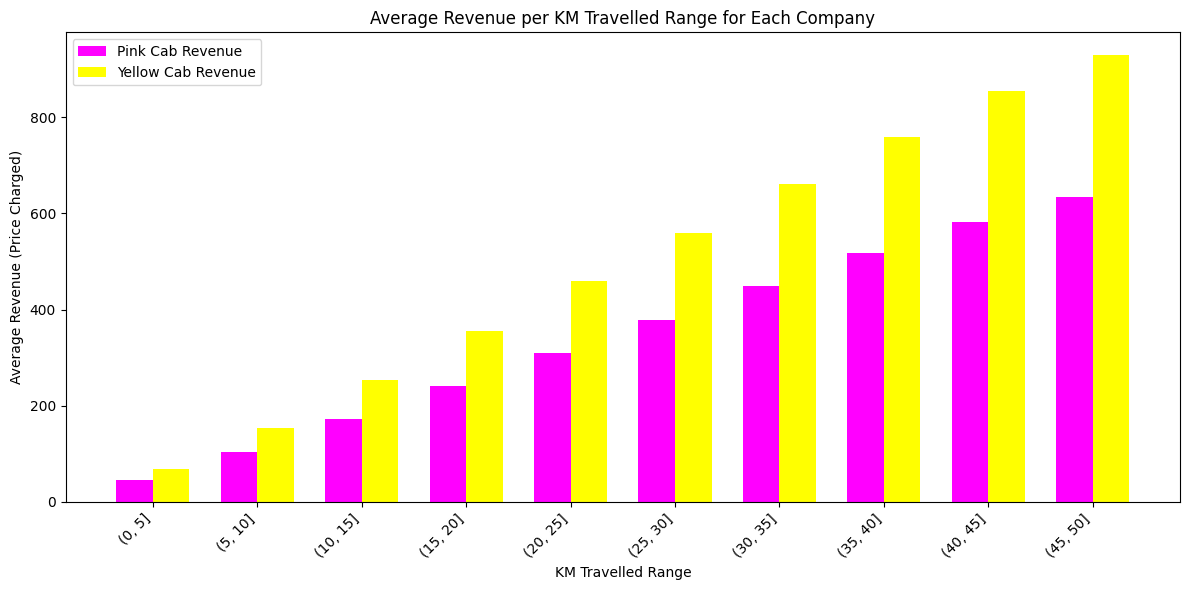

In [8]:
# Create bins for KM Travelled (e.g., intervals of 5 km)
bin_edges = range(0, int(df_cab_data['KM Travelled'].max()) + 5, 5)
bins = pd.cut(df_cab_data['KM Travelled'], bins=bin_edges)

# Group by the bins and company, then calculate the average Price Charged (Revenue)
grouped_data = df_cab_data.groupby([bins, 'Company'], observed=False).agg({
    'Price Charged': 'mean'  # Average Revenue
}).reset_index()

# Pivot the data so that we have separate columns for each company
revenue_data = grouped_data.pivot(index='KM Travelled', columns='Company', values='Price Charged')

# Define the width of the bars and the positions on the x-axis
bar_width = 0.35
index = range(len(revenue_data))

# Plot for Revenue using df_cab_data
fig, ax2 = plt.subplots(figsize=(12, 6))
ax2.bar(index, revenue_data['Pink Cab'], bar_width, color='magenta', label='Pink Cab Revenue')
ax2.bar([i + bar_width for i in index], revenue_data['Yellow Cab'], bar_width, color='yellow', label='Yellow Cab Revenue')

# Add labels and title
ax2.set_xlabel('KM Travelled Range')
ax2.set_ylabel('Average Revenue (Price Charged)')
ax2.set_title('Average Revenue per KM Travelled Range for Each Company')

# Set the x-axis labels to the KM Travelled bins
ax2.set_xticks([i + bar_width / 2 for i in index])
ax2.set_xticklabels(revenue_data.index.astype(str), rotation=45, ha='right')

# Add legend
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


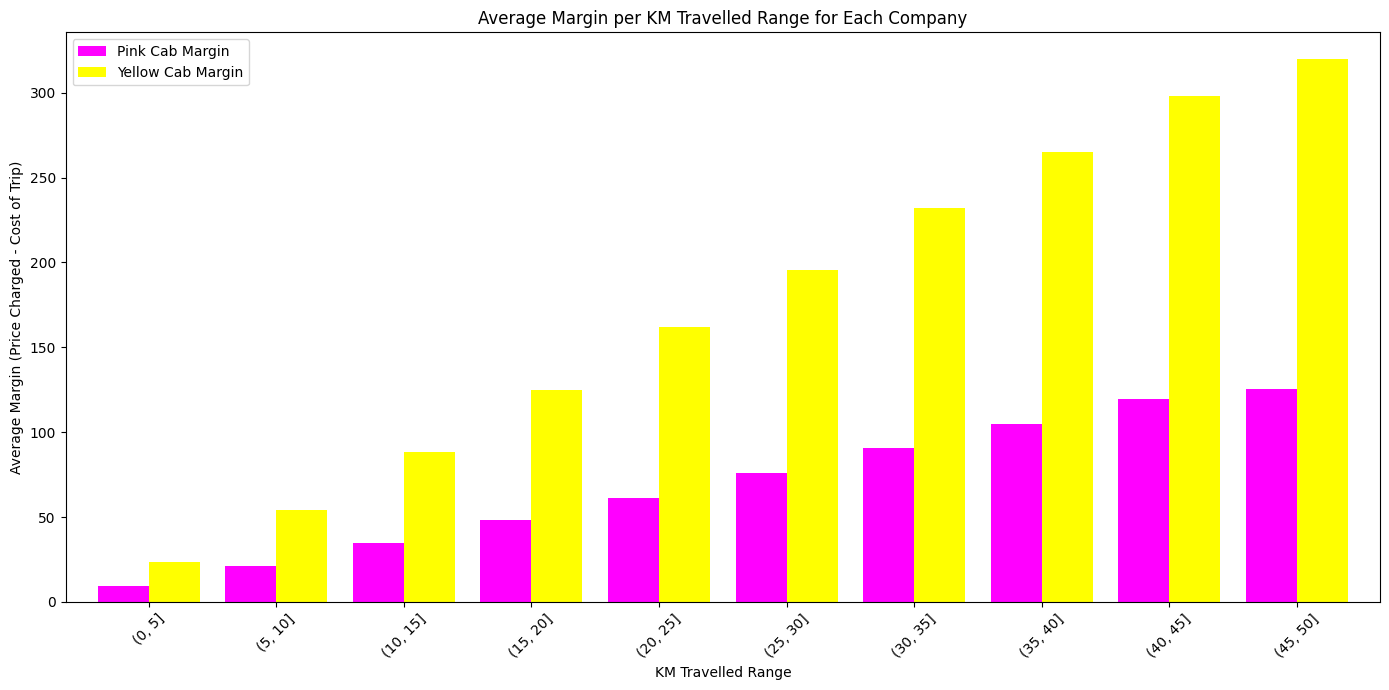

In [9]:
df_cab_data['Margin'] = df_cab_data['Price Charged'] - df_cab_data['Cost of Trip']

# Creating bins for KM travelled
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['(0, 5]', '(5, 10]', '(10, 15]', '(15, 20]', '(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]']
df_cab_data['KM Travelled Range'] = pd.cut(df_cab_data['KM Travelled'], bins=bins, labels=labels)

# Grouping by company and distance range to calculate the average margin
margin_per_km_range = df_cab_data.groupby(['KM Travelled Range', 'Company'], observed=True)['Margin'].mean().unstack()

# Plotting the bar chart for margin
margin_per_km_range.plot(kind='bar', width=0.8, figsize=(14, 7), color=['magenta', 'yellow'])

plt.title('Average Margin per KM Travelled Range for Each Company')
plt.xlabel('KM Travelled Range')
plt.ylabel('Average Margin (Price Charged - Cost of Trip)')
plt.legend(['Pink Cab Margin', 'Yellow Cab Margin'])
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Hypothesis 3

Is there a specific time period where one company sees a spike in users compared to the other?

In [10]:
# Test for date format

# Example serial date number from Excel
serial_date = 42377

# Convert the serial date to a readable datetime
readable_date = pd.to_datetime(serial_date, origin='1899-12-30', unit='D')

print(readable_date)

2016-01-08 00:00:00


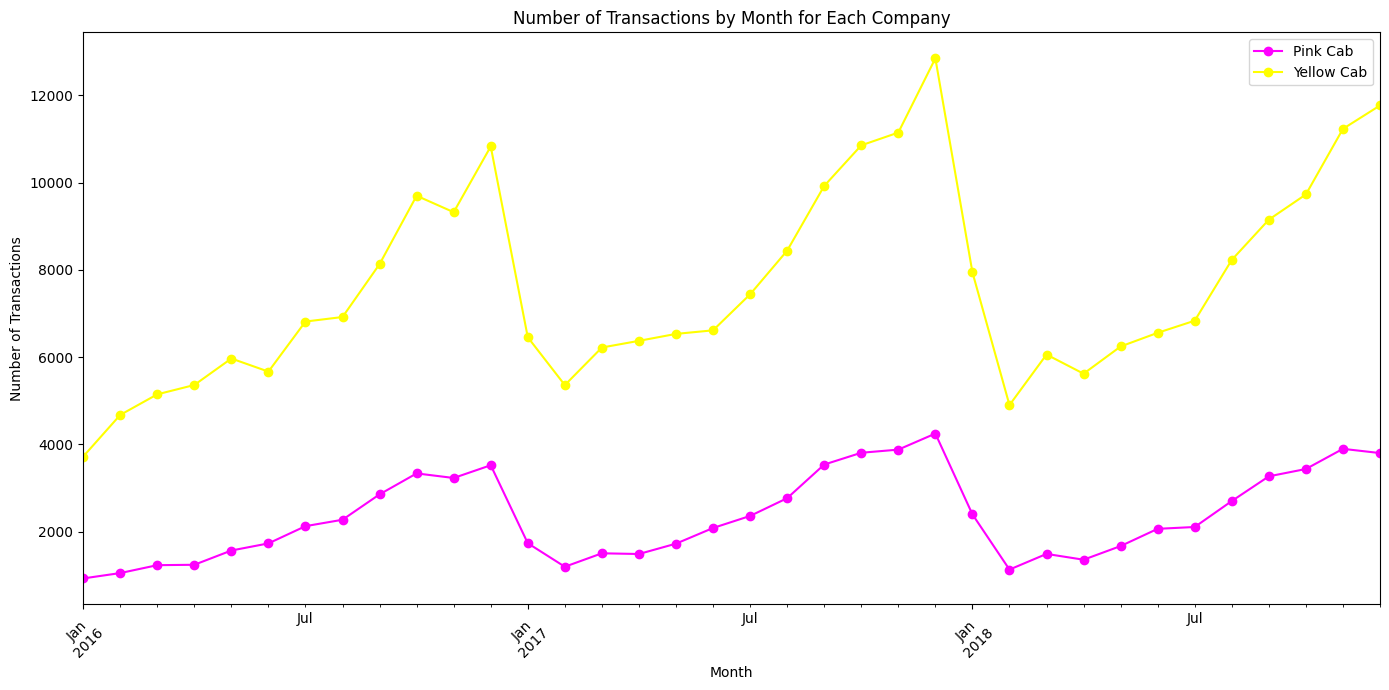

In [11]:
# Extract month and year from the 'Date of Travel'
df_cab_data['YearMonth'] = df_cab_data['Date of Travel'].dt.to_period('M')

# Group by month and company, then count the number of transactions
transactions_by_month = df_cab_data.groupby(['YearMonth', 'Company']).size().unstack()

# Plotting the number of transactions by month for each company
transactions_by_month.plot(kind='line', figsize=(14, 7), marker='o', color=['magenta', 'yellow'])

plt.title('Number of Transactions by Month for Each Company')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Hypothesis 4

Does a higher number of repeat customers correlate with higher profitability for one company over the other?

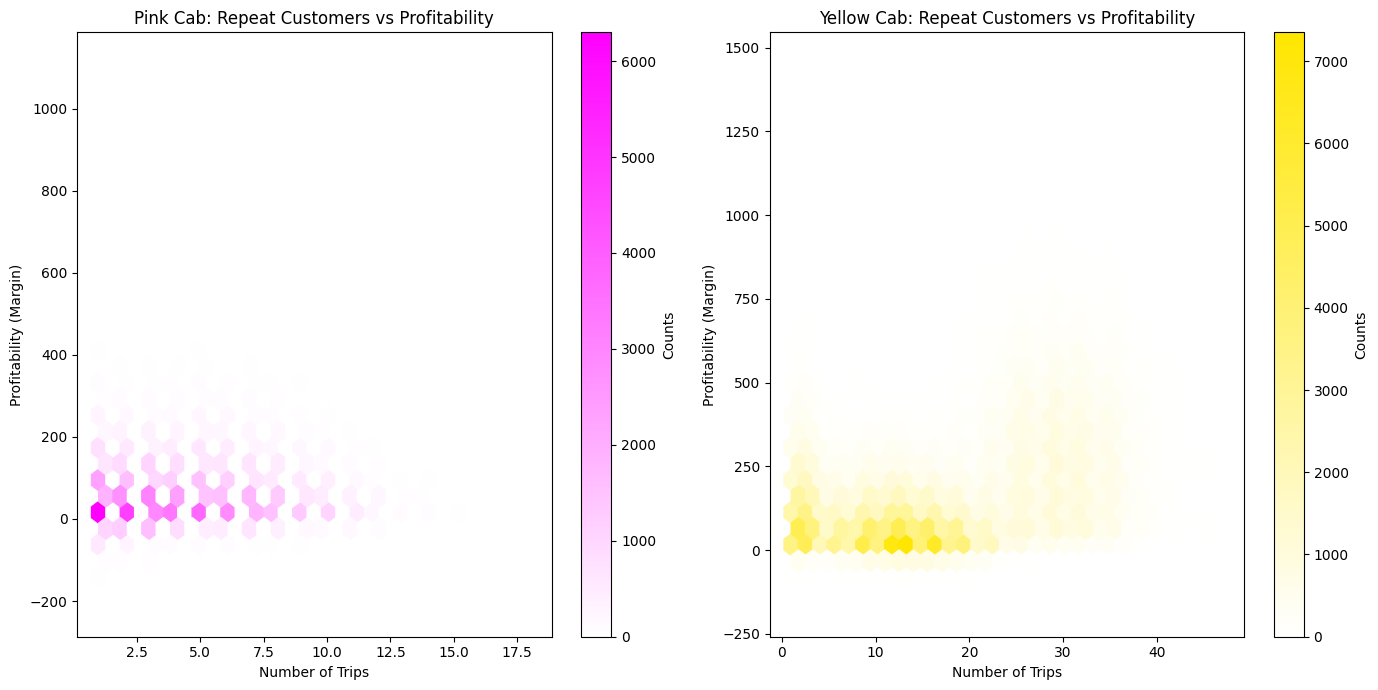

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Calculate Margin (Price Charged - Cost of Trip)
df_cab_data['Margin'] = df_cab_data['Price Charged'] - df_cab_data['Cost of Trip']

# Group the data by 'Customer ID' and 'Company' to count the number of trips per customer
df_customer_trips = df_cab_data.groupby(['Customer ID', 'Company']).size().reset_index(name='Number of Trips')

# Merge the count of trips with the main cab data to include profit/margin information
df_merged = pd.merge(df_cab_data, df_customer_trips, on=['Customer ID', 'Company'])

# Separate data for Pink Cab and Yellow Cab
pink_cab_data = df_merged[df_merged['Company'] == 'Pink Cab']
yellow_cab_data = df_merged[df_merged['Company'] == 'Yellow Cab']

# Create magenta colormap
magenta_cmap = LinearSegmentedColormap.from_list('magenta_cmap', ['white', 'magenta'])
yellow_cmap = LinearSegmentedColormap.from_list('yellow_cmap', ['white', '#ffe600'])

# SCreate subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for Pink Cab
hb1 = axes[0].hexbin(pink_cab_data['Number of Trips'], pink_cab_data['Margin'], gridsize=30, cmap=magenta_cmap)
axes[0].set_title('Pink Cab: Repeat Customers vs Profitability')
axes[0].set_xlabel('Number of Trips')
axes[0].set_ylabel('Profitability (Margin)')
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('Counts')

# Plot for Yellow Cab
hb2 = axes[1].hexbin(yellow_cab_data['Number of Trips'], yellow_cab_data['Margin'], gridsize=30, cmap=yellow_cmap)
axes[1].set_title('Yellow Cab: Repeat Customers vs Profitability')
axes[1].set_xlabel('Number of Trips')
axes[1].set_ylabel('Profitability (Margin)')
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('Counts')

plt.tight_layout()
plt.show()

## Hypothesis 5

What is the preferred payment method (cash or card) for each company's customers, and does this affect revenue?

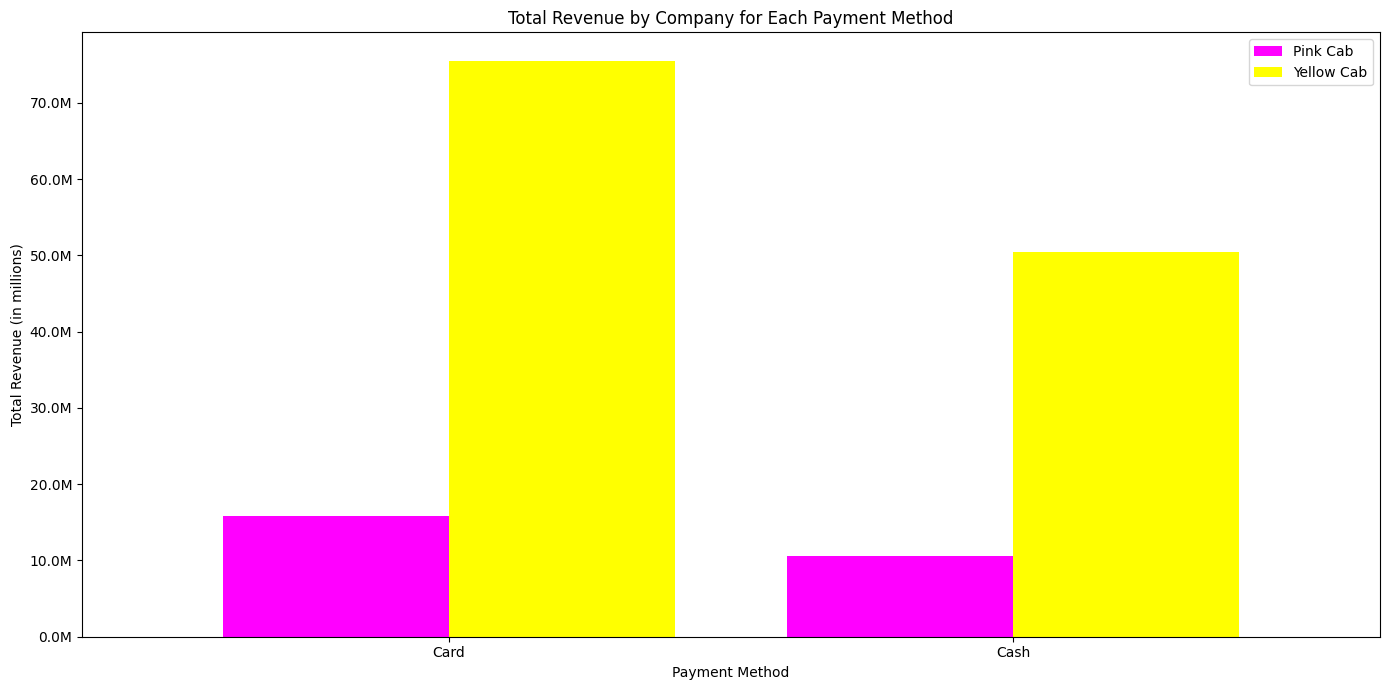

In [13]:
import matplotlib.ticker as mtick

# Grouping by payment method and company to calculate the total revenue
revenue_by_payment_method = df_cab_data.groupby(['Payment_Mode', 'Company'])['Price Charged'].sum().unstack()

# Plotting the bar chart for total revenue by company for each payment method (Card, Cash)
ax = revenue_by_payment_method.plot(kind='bar', figsize=(14, 7), color=['magenta', 'yellow'], width=0.8)

plt.title('Total Revenue by Company for Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue (in millions)')

# Formatting the y-axis to show numbers in millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.legend(['Pink Cab', 'Yellow Cab'])
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

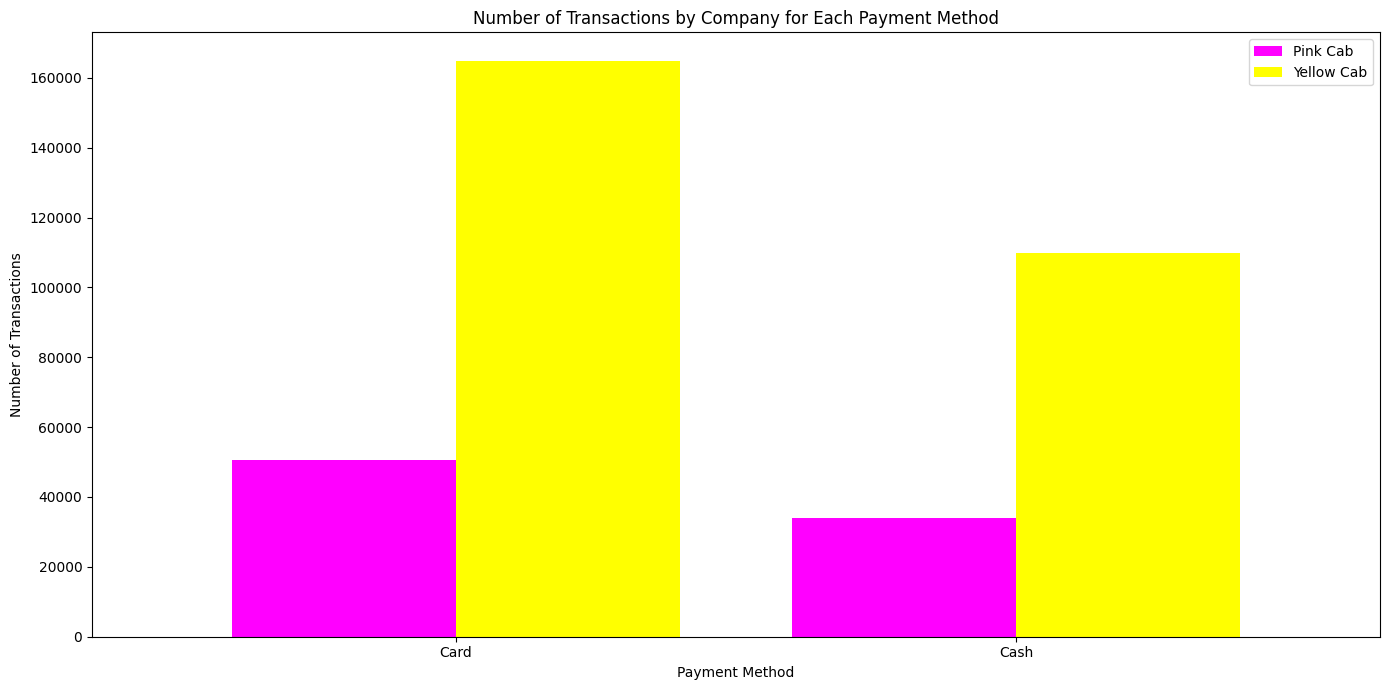

In [14]:
# Grouping by payment method and company to count the number of transactions
transactions_by_payment_method = df_cab_data.groupby(['Payment_Mode', 'Company']).size().unstack()

# Plotting the bar chart for the number of transactions by company for each payment method (Card, Cash)
ax = transactions_by_payment_method.plot(kind='bar', figsize=(14, 7), color=['magenta', 'yellow'], width=0.8)

plt.title('Number of Transactions by Company for Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')

# Adding legend to distinguish between Pink Cab and Yellow Cab
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

## Hypothesis 6

Which company operates more efficiently in terms of cost vs. revenue per trip?

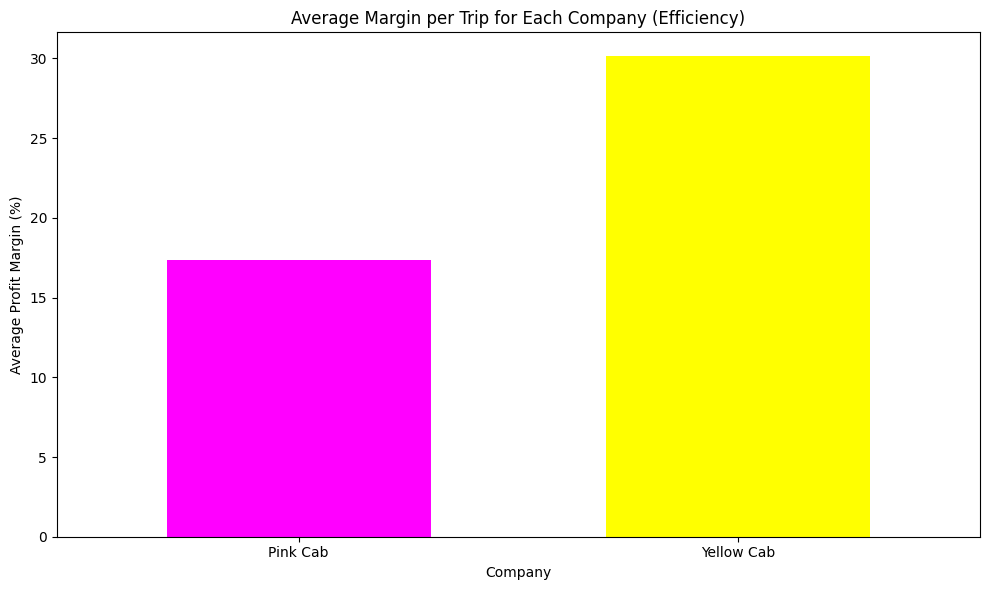

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the margin per trip (profit percentage)
df_cab_data['Margin (%)'] = ((df_cab_data['Price Charged'] - df_cab_data['Cost of Trip']) / df_cab_data['Price Charged']) * 100

# Group by company to calculate the average margin per trip for each company
avg_margin_per_company = df_cab_data.groupby('Company')['Margin (%)'].mean()

# Plotting the bar chart for average margin per trip for each company
ax = avg_margin_per_company.plot(kind='bar', figsize=(10, 6), color=['magenta', 'yellow'], width=0.6)

plt.title('Average Margin per Trip for Each Company (Efficiency)')
plt.xlabel('Company')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


## Hypothesis 7

Over the time of data which company his increasing profits, and by how much?

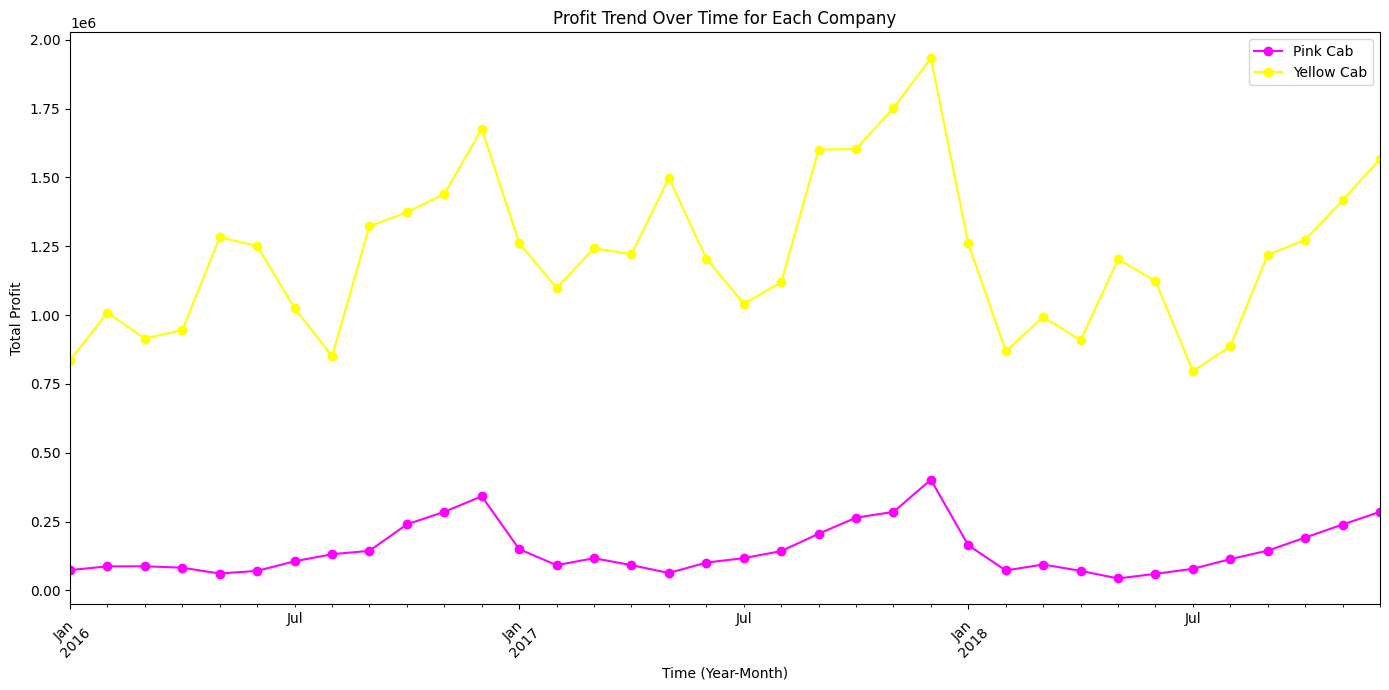

In [16]:
# Calculate the profit per trip (Price Charged - Cost of Trip)
df_cab_data['Profit'] = df_cab_data['Price Charged'] - df_cab_data['Cost of Trip']

# Extract Year-Month from the Date of Travel
df_cab_data['YearMonth'] = df_cab_data['Date of Travel'].dt.to_period('M')

# Group by YearMonth and Company to calculate the total profit over time
profit_over_time = df_cab_data.groupby(['YearMonth', 'Company'])['Profit'].sum().unstack()

# Plotting the line graph to show profit trends over time for each company
ax = profit_over_time.plot(kind='line', figsize=(14, 7), marker='o', color=['magenta', 'yellow'])

plt.title('Profit Trend Over Time for Each Company')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Profit')
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

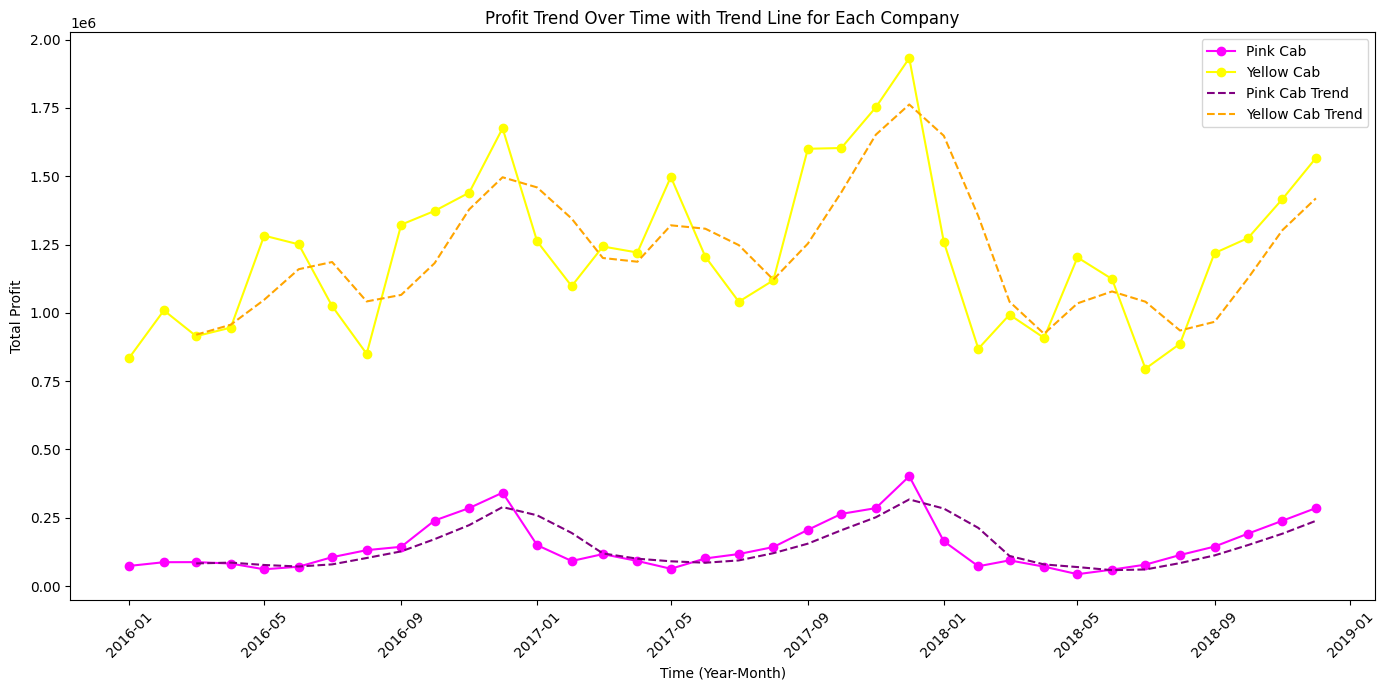

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cab_data is already merged and contains 'Date of Travel'
# Convert 'Date of Travel' to datetime if not already in that format
df_cab_data['Date of Travel'] = pd.to_datetime(df_cab_data['Date of Travel'])

# Calculate the profit per trip (Price Charged - Cost of Trip)
df_cab_data['Profit'] = df_cab_data['Price Charged'] - df_cab_data['Cost of Trip']

# Extract Year-Month from the Date of Travel and convert it to datetime
df_cab_data['YearMonth'] = df_cab_data['Date of Travel'].dt.to_period('M').dt.to_timestamp()

# Group by YearMonth and Company to calculate the total profit over time
profit_over_time = df_cab_data.groupby(['YearMonth', 'Company'])['Profit'].sum().unstack()

# Calculate a rolling mean (trend line) for each company over a 3-month window
rolling_mean = profit_over_time.rolling(window=3).mean()

# Plotting the line graph to show profit trends over time for each company
plt.figure(figsize=(14, 7))

# Plot original profit data for each company
plt.plot(profit_over_time.index, profit_over_time['Pink Cab'], label='Pink Cab', marker='o', color='magenta')
plt.plot(profit_over_time.index, profit_over_time['Yellow Cab'], label='Yellow Cab', marker='o', color='yellow')

# Plot rolling mean (trend line) for each company
plt.plot(rolling_mean.index, rolling_mean['Pink Cab'], label='Pink Cab Trend', linestyle='--', color='purple')
plt.plot(rolling_mean.index, rolling_mean['Yellow Cab'], label='Yellow Cab Trend', linestyle='--', color='orange')

plt.title('Profit Trend Over Time with Trend Line for Each Company')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

## Final Analysis

**What is the business problem?**

The business problem is determining which cab company is a better investment for the pirvate firm, XYZ.


**What are the properties of the data provided (data intake report)**

There were four files of data. First is Cab Data, which holds data of each trans action from 31/01/2016 to 31/12/2018. It contains the following columns of data: Transaction ID, Date of Travel, Company City, KM Travelled, Price Charged and Cost of Trip.
The Second, labled City, contained, City (Where the transactions take place), Population (of each respective city),	Users (combined from both companies for each city).
Third, we have Customer ID, which is a mapping table that contains a unique identifier which links the customer’s demographic details. It contains Customer ID, Gender, Age, Income (USD/Month)
Fourth we have Transaction ID, which is a mapping table that contains transaction to customer mapping and payment mode. Containing, Transaction ID, Customer ID, Payment_Mode (Card or Cash).


**What steps did you take in order to create an applicable data set?**

First I cleaned the data, as shown in the beginning of the EDA Notebook. Before that I saw the Cab Data and Transaction ID had a clean and easy opportunity to be merged. This merged data set contain everything needed to show a visualization to represent each of the hypotheses I had.


**How did you prepare and perform your analysis?**

I did some research on what makes for a good investment. I also asked one of family members, who is a an investment analyst, what makes a good investment. The answer I got from both, is two things in this case. Profit (Margins) and Growth were the answer I found after my search. This guided the hypotheses I created to help me determine what the better investment is for XYZ company.


**What type of analysis did you perform?**

I did analysis specifically related to the hypotheses I created, which lead me to create the following graphs/visuals:

Number of Cab Users in Different Cities for Each Company
Average Revenue per KM Travelled Range for Each Company
Average Margin per KM Travelled Range for Each Company
Number of Transactions by Month for Each Company
Pink Cab: Repeat Customers vs Profitability
Yellow Cab: Repeat Customers vs Profitability
Total Revenue by Company for Each Payment Method
Number of Transactions by Company for Each Payment Method
Average Margin per Trip for Each Company (Efficiency)
Profit Trend Over Time for Each Company
Profit Trend Over Time with Trend Line for Each Company


**Why did you choose to use certain analytical techniques over others?**

I initially choose and experimented with various different graphs and charts, but the most clear graphs and easy to understand graphs are the ones I ended up with: bar graphs and line charts. The one exception is the hexbin plot. I initially used a scatter plot, but it was difficult to distinguish the plots from each other, so I opted for the hexbin plot which exchanged the mess of plots for a visualization of density.

## Conclusion

**What were the results?**

The financial performance of both cab companies primarily depends on profit, which is calculated as the difference between the price charged and the cost of each trip. These two variables are strongly influenced by the distance traveled per trip. Additionally, the total distance traveled in a day correlates positively with the number of trips taken each day.

The number of rides shows seasonality. Ride volumes peak in December and are at their lowest in February.

Yellow Cab has a broader city coverage and a more loyal customer base compared to Pink Cab. Furthermore, Yellow Cab performs well across most cities and generates significantly higher profits than its competitor.